# Week 1 - Preproccesing the data, descriptive statistics

## Loading libraries and imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df1 = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/primekg_cardiovascular_20240223_scores.tsv" , sep='\t')
df2 = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/ctd_cadiovascular_20240223_scores.tsv", sep='\t') 


In [14]:
#Exploting first columns
print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
print(df2.head())

DataFrame 1:
     drugA    drugB     sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB  \
0  DB06709  DB08506  0.3427     0     0.615       0.630     0.46     0.74   
1  DB06709  DB02376  0.4188     0     0.685       0.685     0.56     0.81   
2  DB06709  DB04282  0.4188     0     0.685       0.685     0.56     0.81   
3  DB06709  DB04564  0.4188     0     0.685       0.685     0.56     0.81   
4  DB06709  DB04659  0.4188     0     0.685       0.685     0.56     0.81   

     zTDA    zTDB  ...  opAD  opBD  meanspAD  meanspBD  medianspAD  \
0  0.4405  1.2862  ...   2.0   0.0    0.5876    0.5654        0.58   
1  0.4405 -1.4371  ...   2.0   0.0    0.5876    0.5854        0.58   
2  0.4405 -1.4371  ...   2.0   0.0    0.5876    0.5854        0.58   
3  0.4405 -1.4371  ...   2.0   0.0    0.5876    0.5854        0.58   
4  0.4405 -1.4371  ...   2.0   0.0    0.5876    0.5854        0.58   

   medianspBD  minspAD  minspBD  maxspAD  maxspBD  
0        0.55      0.0     0.28     1.19     1.12  

## Exploring different z-scores in the datasets

In [15]:
#Computing differences
zTDAscore_difference = df1['zTDA'] - df2['zTDA']
zDTAscore_difference = df1['zDTA'] - df2['zDTA']

In [16]:
#Basic statistical z-score differences between datasets
print("\nStatistics of zTDA-score differences:")
print(zTDAscore_difference.describe())

print("\nStatistics of zDTA-score differences:")
print(zDTAscore_difference.describe())


Statistics of zTDA-score differences:
count    9.730666e+06
mean    -8.606256e-02
std      9.563186e-01
min     -5.168600e+00
25%     -1.167000e-01
50%     -7.830000e-02
75%     -4.810000e-02
max      4.952700e+00
Name: zTDA, dtype: float64

Statistics of zDTA-score differences:
count    9.730666e+06
mean     2.248912e-01
std      1.224002e+00
min     -7.072600e+00
25%     -2.875000e-01
50%     -1.038000e-01
75%      6.948000e-01
max      6.784500e+00
Name: zDTA, dtype: float64


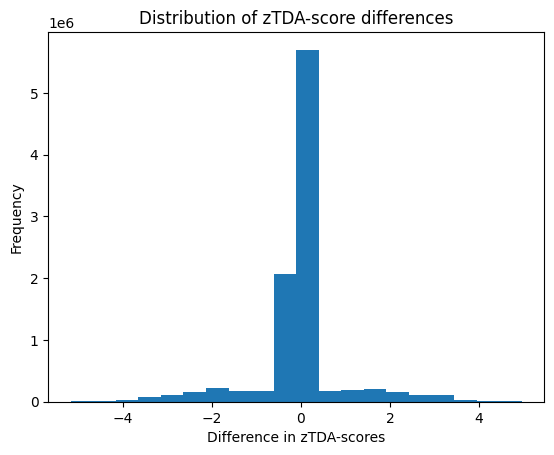

In [17]:
#Visualizing the distribution of zTDa-score differences 
plt.hist(zTDAscore_difference, bins=20)
plt.xlabel('Difference in zTDA-scores')
plt.ylabel('Frequency')
plt.title('Distribution of zTDA-score differences')
plt.show()

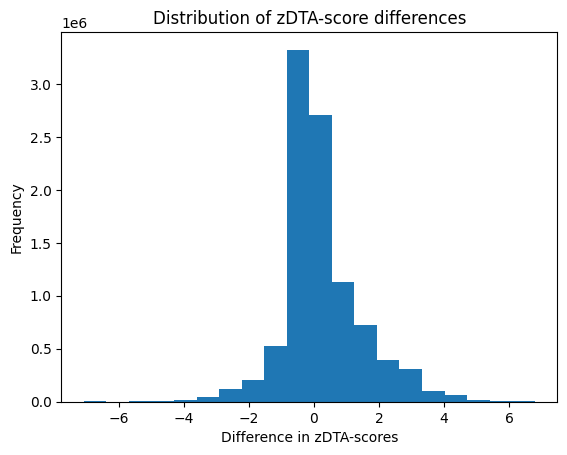

In [18]:
#Visualizing the distribution of zDTA-score differences 
plt.hist(zDTAscore_difference, bins=20)
plt.xlabel('Difference in zDTA-scores')
plt.ylabel('Frequency')
plt.title('Distribution of zDTA-score differences')
plt.show()

In [19]:
zDTA_scores_df1 = df1['zDTA']
zDTA_scores_df2 = df2['zDTA']
zTDA_scores_df1 = df1['zTDA']
zTDA_scores_df2 = df2['zTDA']

t_statistic, p_value = stats.ttest_ind(zDTA_scores_df1, zDTA_scores_df2)

alpha = 0.05
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant difference between zDTA scores in prime_kg and ctd datasets.")
else:
    print("There is no significant difference between zDTA and zDTA scores in prime_kg and ctd datasets.")


T-statistic: 322.4947471186928
P-value: 0.0
There is a significant difference between zDTA and zTDA scores.


In [20]:
t_statistic, p_value = stats.ttest_ind(zTDA_scores_df1, zTDA_scores_df2)

alpha = 0.05
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant difference between zTDA and zTDA scores in prime_kg and ctd datasets.")
else:
    print("There is no significant difference between zDTA and zDTA scores in prime_kg and ctd datasets.")


T-statistic: -163.0319344481996
P-value: 0.0
There is a significant difference between zTDA and zTDA scores in prime_kg and ctd datasets.
